In [2]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv(r'C:\Users\Mohammed\Desktop\task 2 data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_6532\846292782.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [9]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_6532\4230643855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


C:\Users\Mohammed\AppData\Local\Temp\ipykernel_6532\796425694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=data, palette=palette_colors)


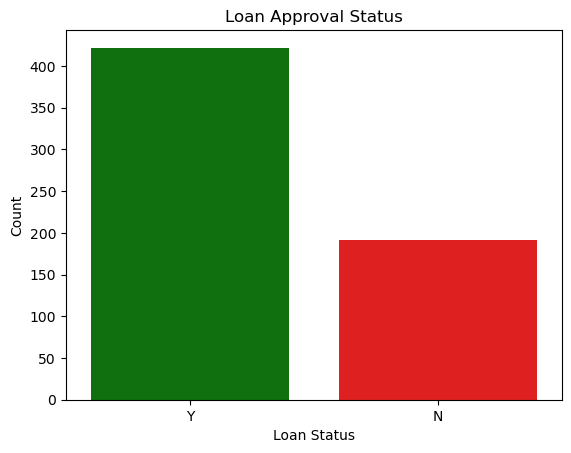

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_colors = {'Y': 'green', 'N': 'red'}

sns.countplot(x='Loan_Status', data=data, palette=palette_colors)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


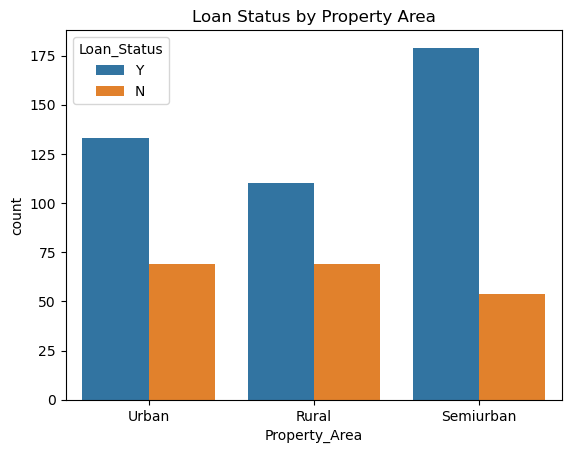

In [31]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.title('Loan Status by Property Area')
plt.show()


In [32]:
import plotly.express as px

In [33]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

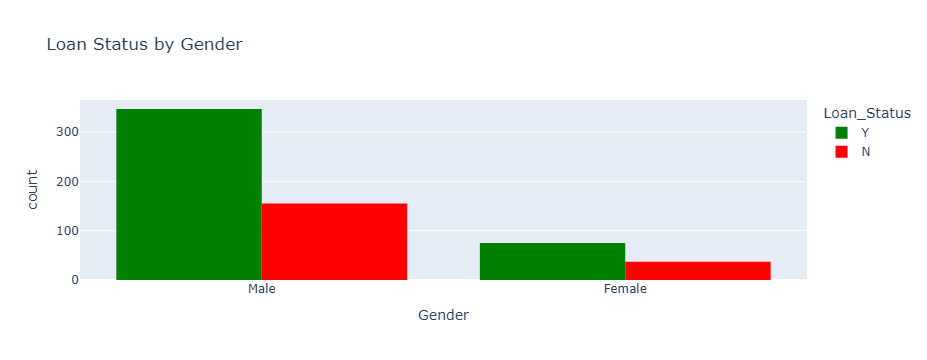

In [38]:
fig = px.histogram(data, x='Gender', color='Loan_Status', barmode='group',
                   color_discrete_map={'Y':'green', 'N':'red'},
                   title='Loan Status by Gender')
fig.show()


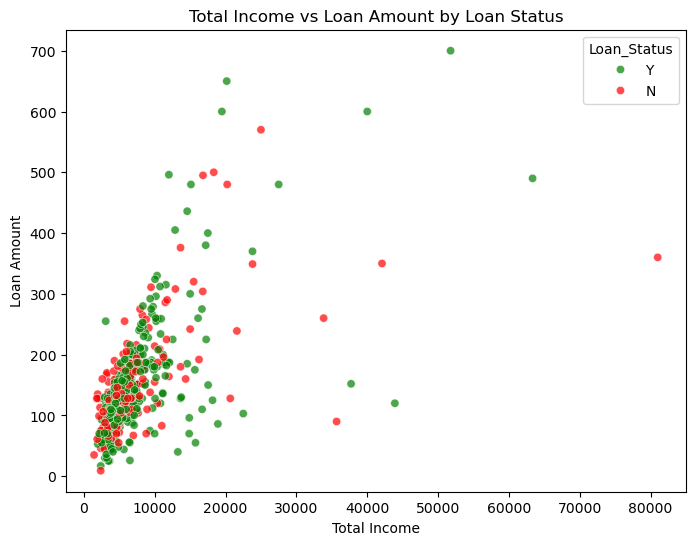

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Income', y='LoanAmount', hue='Loan_Status', data=data,
                palette={'Y':'green', 'N':'red'}, alpha=0.7)
plt.title('Total Income vs Loan Amount by Loan Status')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.show()


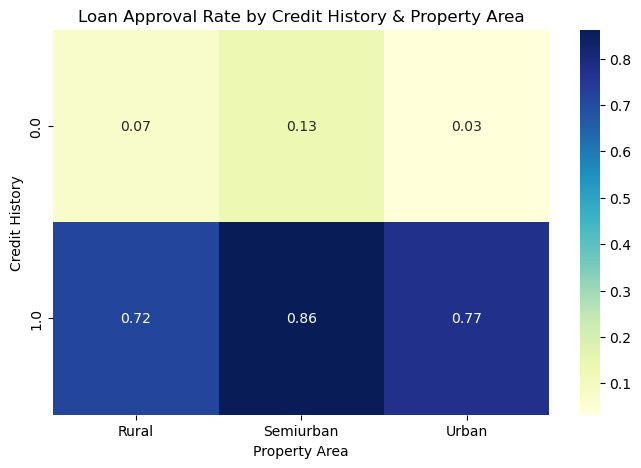

In [42]:
approval_rate = pd.crosstab(data['Credit_History'], data['Property_Area'], 
                            values=data['Loan_Status'].map({'Y':1,'N':0}), aggfunc='mean')

plt.figure(figsize=(8,5))
sns.heatmap(approval_rate, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Loan Approval Rate by Credit History & Property Area')
plt.xlabel('Property Area')
plt.ylabel('Credit History')
plt.show()


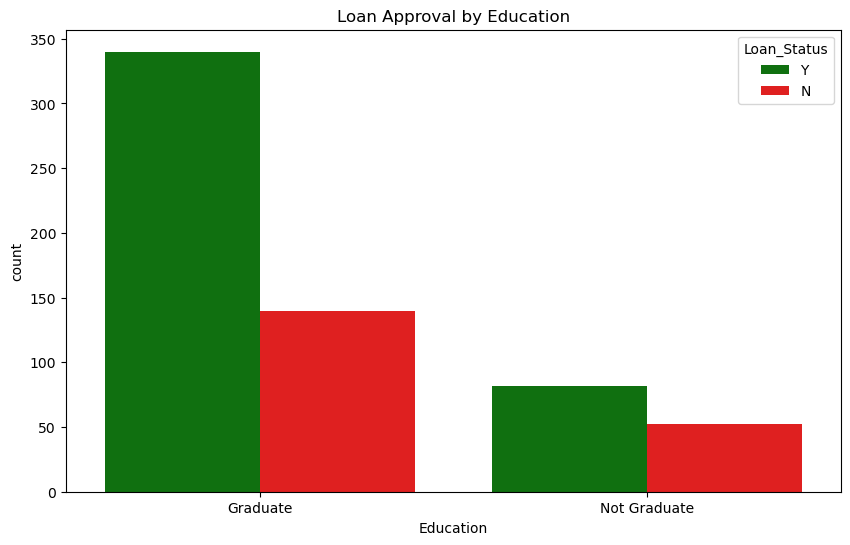

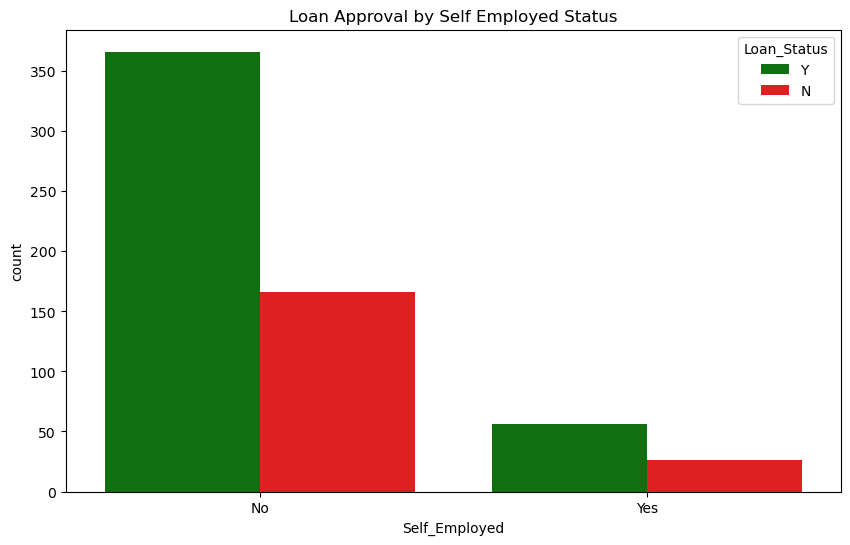

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Loan_Status', data=data, palette={'Y':'green', 'N':'red'})
plt.title('Loan Approval by Education')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data, palette={'Y':'green', 'N':'red'})
plt.title('Loan Approval by Self Employed Status')
plt.show()


C:\Users\Mohammed\AppData\Local\Temp\ipykernel_6532\695930412.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Mohammed\AppData\Local\Temp\ipykernel_6532\695930412.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




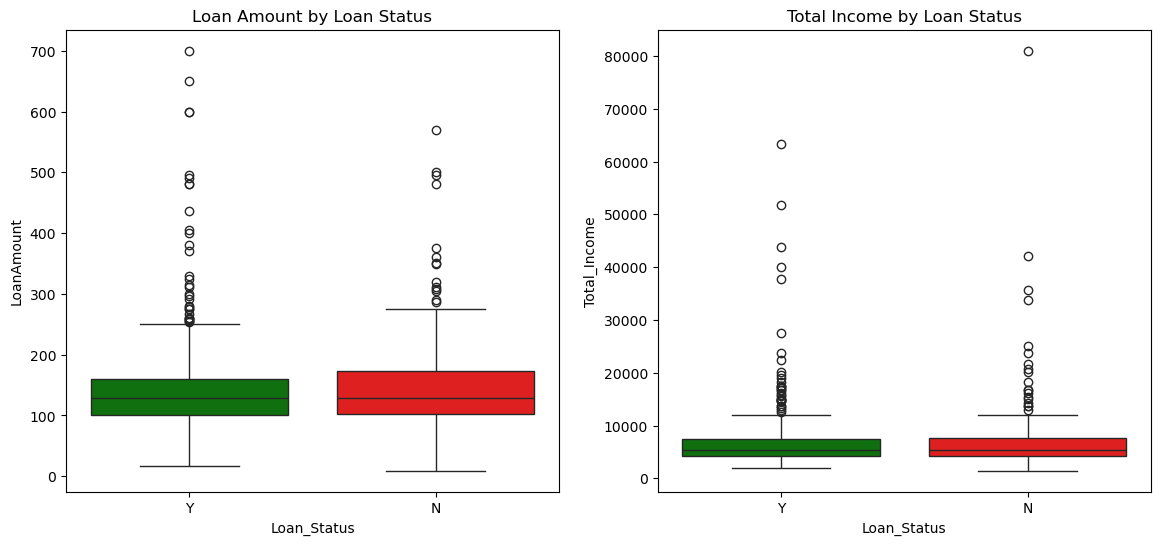

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(x='Loan_Status', y='LoanAmount', data=data, palette={'Y':'green', 'N':'red'}, ax=axs[0])
axs[0].set_title('Loan Amount by Loan Status')

sns.boxplot(x='Loan_Status', y='Total_Income', data=data, palette={'Y':'green', 'N':'red'}, ax=axs[1])
axs[1].set_title('Total Income by Loan Status')

plt.show()


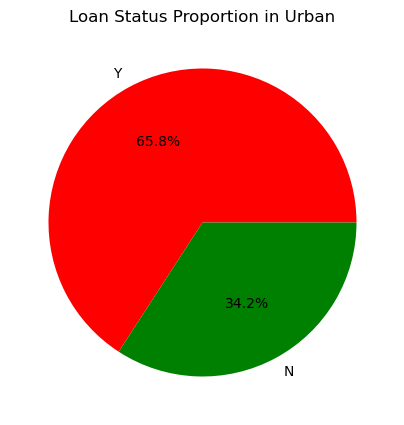

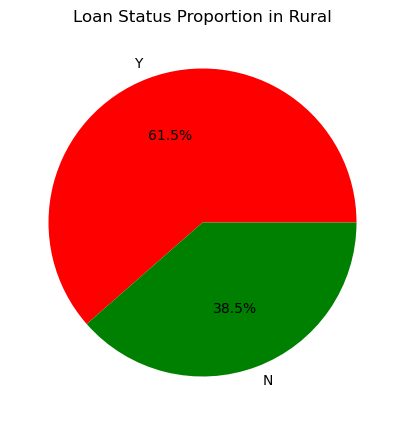

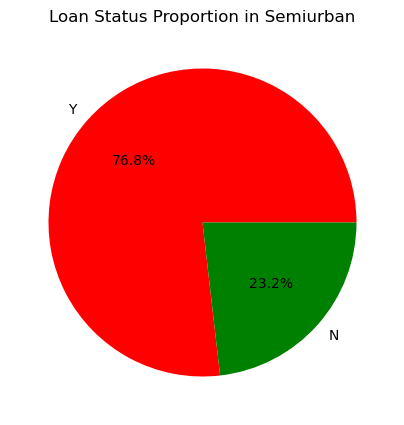

In [51]:
for area in data['Property_Area'].unique():
    subset = data[data['Property_Area'] == area]['Loan_Status'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(subset, labels=subset.index, autopct='%1.1f%%', colors=['red','green'])
    plt.title(f'Loan Status Proportion in {area}')
    plt.show()
